## 2 Nearest Neighbor Classification on Real Data

### 2.1 Exploring the Data

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits ()
print(digits.keys())
data = digits ["data"]
images = digits ["images"]
target = digits ["target"]
target_names = digits ["target_names"]

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [2]:
print(data.dtype)
print(data.shape)

float64
(1797, 64)


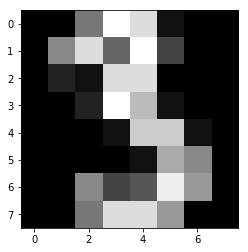

In [3]:
img = images[3]
plt.figure()
plt.gray()
plt.imshow(img, interpolation="nearest")
plt.show()

In [4]:
from sklearn import model_selection

X_all = data
y_all = target

X_train, X_test, y_train, y_test = model_selection.train_test_split(digits.data, digits.target, test_size=0.4, random_state=0)

### 2.2 Distance function computation using loops

In [5]:
def dist_loop(training, test):
    N = training.shape[0]
    M = test.shape[0]
    dists = np.empty((N,M), dtype=np.float32)
    
    for i in range(N):
        for j in range(M):
            dists[i,j] = np.linalg.norm(training[i] - test[j])
            
    return dists

In [6]:
%timeit dist_loop(X_train, X_test)

2.82 s ± 22.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 2.3 Distance function computation using vectorization

In [9]:
def dist_vec(training, test):
    return np.linalg.norm(training[:,np.newaxis,:] - test[np.newaxis,:,:], axis=2)

In [13]:
%timeit dist_vec(X_train, X_test)

354 ms ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 2.4 Implement the nearest neighbor classifier

### 2.5 Generalize to k-nearest neighbors 

## 3 Cross-validation